# Data viz project

### Import useful libraries

In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Read the data and clean it

Read the HPI data and convert the date format

In [2]:
hpi_raw_data=pd.read_csv("UK-HPI-full-file-2023-02.csv"); # load the data
hpi_dataframe=hpi_raw_data[['Date', 'RegionName', 'AreaCode', 'AveragePrice']].copy(); # extract the data that refer only to restrict number of columns.
hpi_dataframe['Date'] = pd.to_datetime(hpi_dataframe['Date'],dayfirst=True); # By default, the date is imported as object. However, it is better to convert the date column from object to date class

Read the geomtery data

In [5]:
england_geo=gpd.read_file('England.json');# read the data for England
scotland_geo=gpd.read_file('Scotland.json');# read the data for Scotland
wales_geo=gpd.read_file('Wales.json');# read the data for Wales
northerireland_geo=gpd.read_file('NortherIrland.json');# read the data for Wales
greatbritain_geo=pd.concat([england_geo,scotland_geo,wales_geo,northerireland_geo]); # combine all the dataframes together

In [6]:
greatbritain_geo['LAD13NM']=greatbritain_geo['LAD13NM'].fillna(greatbritain_geo['LGDNAME']); # fill the nan values: the LAD13nM field is called LGDNAME in Northern Ireland
greatbritain_geo['LAD13CD']=greatbritain_geo['LAD13CD'].fillna(greatbritain_geo['LGDCode']); # fill the nan values: the LAD13CD field is called LGDCode in Northern Ireland
greatbritain_geo=greatbritain_geo[['LAD13CD','LAD13NM','geometry']]; # retain only some columns
greatbritain_geo=greatbritain_geo.rename(columns={ "LAD13CD": "AreaCode", "LAD13NM": "RegionName"}); # rename the columns to easier names

## Merge the databases

In [7]:
greatbritain_hpi=greatbritain_geo.merge(hpi_dataframe, on='AreaCode'); # merge the databases on the area code

## Plot the data

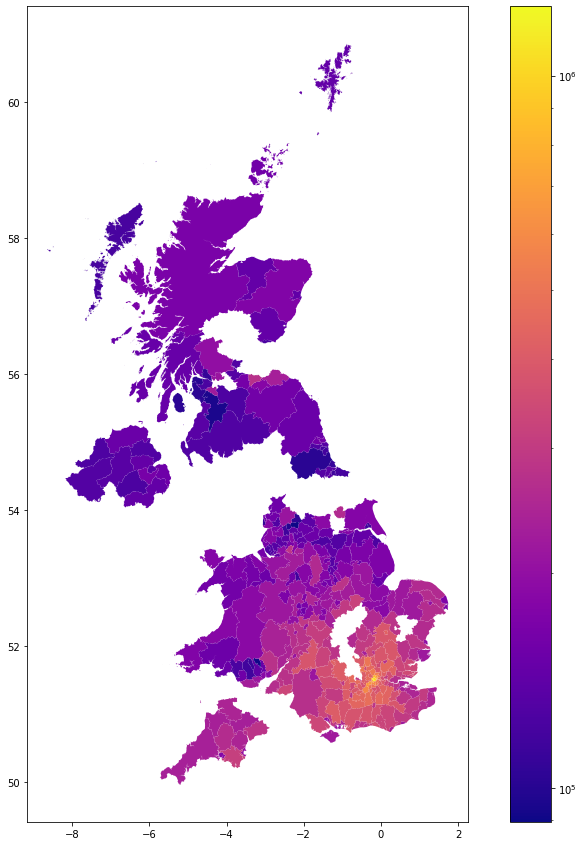

In [21]:
time_analysis= np.datetime64('2020-01-01'); # in the first phase, will only work with the data for a give date
fig,ax=plt.subplots(figsize=[15,15])
vmin=min(greatbritain_hpi[greatbritain_hpi.Date==time_analysis]['AveragePrice']);
vmax=max(greatbritain_hpi[greatbritain_hpi.Date==time_analysis]['AveragePrice']);
greatbritain_hpi[greatbritain_hpi.Date==time_analysis].plot(ax=ax,column="AveragePrice",legend=True,cmap='plasma',norm=colors.LogNorm(vmin=vmin, vmax=vmax)); # extract the dataset for that given date

In [7]:
time_analysis= np.datetime64('2023-01-01'); # in the first phase, will only work with the data for a give date
df_grouped=df_reduced[df_reduced.Date==time_analysis].copy(); # extract the dataset for that given date

In [8]:
df_dic=df_reduced.groupby('RegionName')['Date','AveragePrice'].agg(dict);
df_dic.head()

/Users/gabrielegranello/opt/anaconda3/envs/geopandas/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,AveragePrice
RegionName,,
Aberdeenshire,"{0: 2004-01-01 00:00:00, 1: 2004-02-01 00:00:0...","{0: 81693.66964, 1: 81678.76231, 2: 83525.0970..."
Adur,"{230: 1995-01-01 00:00:00, 231: 1995-02-01 00:...","{230: 54516.42545, 231: 55708.33312, 232: 5572..."
Amber Valley,"{568: 1995-01-01 00:00:00, 569: 1995-02-01 00:...","{568: 45424.80814, 569: 45781.055089999994, 57..."
Angus,"{906: 2004-01-01 00:00:00, 907: 2004-02-01 00:...","{906: 71248.9951, 907: 71540.15324, 908: 70457..."
Antrim and Newtownabbey,"{1136: 2005-01-01 00:00:00, 1137: 2005-02-01 0...","{1136: 114851.5283, 1137: 114851.5283, 1138: 1..."


Discard any macro-region (e.g. England) from the dataset

In [9]:
regions_to_discard=['England','Scotland','Wales','Northern Ireland']; # We will work with local authorities, so we can discard high level geographical boundaries. Create a list with the elements to discard.
df_final=df_grouped[~df_grouped.RegionName.isin(regions_to_discard)].copy(); # find the rows where the region name is equal a value within the list. The function returns true when the values are met. The ~ operator swaps true and false.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 228 to 135313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          401 non-null    datetime64[ns]
 1   RegionName    401 non-null    object        
 2   AreaCode      401 non-null    object        
 3   AveragePrice  401 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.7+ KB


Export the data in a json file

In [6]:
df_final['Date'] = df_final['Date'].dt.strftime('%Y-%m-%d')
df_final.to_json(path_or_buf='HPI.json', orient='records')

In [28]:
df_final.head()

,Date,RegionName,AreaCode,AveragePrice
228,2023-01-01,Aberdeenshire,S12000034,202403.7203
566,2023-01-01,Adur,E07000223,390227.5590
904,2023-01-01,Amber Valley,E07000032,236013.4828
1134,2023-01-01,Angus,S12000041,170698.6482
1352,2023-01-01,Antrim and Newtownabbey,N09000001,179433.9255


### Read the json file with the coordinates of the area

In [30]:
greatbritain_geo.head()

,AreaCode,RegionName,geometry
0,E06000001,Hartlepool,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54..."
1,E06000002,Middlesbrough,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54..."
2,E06000003,Redcar and Cleveland,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54..."
3,E06000004,Stockton-on-Tees,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54..."
4,E06000005,Darlington,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669..."


<AxesSubplot:>

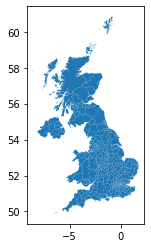

In [31]:
fig,ax=plt.subplots()
greatbritain_geo.plot(ax=ax)


In [33]:
greatbritain_hpi.head()

,AreaCode,RegionName_x,geometry,Date,RegionName_y,AveragePrice
0,E06000001,Hartlepool,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54...",2023-01-01,Hartlepool,138602.6078
1,E06000002,Middlesbrough,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54...",2023-01-01,Middlesbrough,145098.9032
2,E06000003,Redcar and Cleveland,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54...",2023-01-01,Redcar and Cleveland,159328.9281
3,E06000004,Stockton-on-Tees,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54...",2023-01-01,Stockton-on-Tees,168640.0668
4,E06000005,Darlington,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669...",2023-01-01,Darlington,161670.0758


In [7]:
import json
json_england = json.load(open('England.json'));  # read the data for England
json_scotalnd= json.load(open('Scotland.json')); # read the data for Scotland
json_wales=json.load(open('Wales.json')); # read the data for Wales
json_northerireland=json.load(open('NortherIrland.json')); # read the data for Norther Ireland
df_england=pd.json_normalize(json_england['features']); # convert json into dataframe
df_scotland=pd.json_normalize(json_scotalnd['features']); # convert json into dataframe
df_wales=pd.json_normalize(json_wales['features']); # convert json into dataframe
df_northerireland=pd.json_normalize(json_northerireland['features']); # convert json into dataframe
df_greatbritain=pd.concat([df_england,df_scotland,df_wales,df_northerireland]); # combine all the dataframes together

In [27]:
greatbritain_geo.head()

,LAD13CD,LAD13NM,geometry
0,E06000001,Hartlepool,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54..."
1,E06000002,Middlesbrough,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54..."
2,E06000003,Redcar and Cleveland,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54..."
3,E06000004,Stockton-on-Tees,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54..."
4,E06000005,Darlington,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669..."


Norther Ireland use a different column for storing the region name and region number. Combine them under the same name.

In [8]:
df_greatbritain['properties.LAD13NM']=df_greatbritain['properties.LAD13NM'].fillna(df_greatbritain['properties.LGDNAME']);
df_greatbritain['properties.LAD13CD']=df_greatbritain['properties.LAD13CD'].fillna(df_greatbritain['properties.LGDCode']);

In [9]:
df_greatbritain=df_greatbritain[['properties.LAD13CD','properties.LAD13NM','geometry.type','geometry.coordinates']]; # retain only some columns
df_greatbritain=df_greatbritain.rename(columns={ "properties.LAD13CD": "AreaCode", "properties.LAD13NM": "RegionName",
                                     "geometry.type":"geometry_type","geometry.coordinates":"geometry_coordinates"}); # rename the columns to easier names

In [10]:
df_greatbritain['Averageprice']=np.nan
df_greatbritain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AreaCode              391 non-null    object 
 1   RegionName            391 non-null    object 
 2   geometry_type         391 non-null    object 
 3   geometry_coordinates  391 non-null    object 
 4   Averageprice          0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 18.3+ KB


In [11]:
for code,price in zip(df_final.AreaCode,df_final.AveragePrice):
    df_greatbritain.loc[df_greatbritain.AreaCode==code,'Averageprice']=price;

In [12]:
df_greatbritain.head()

,AreaCode,RegionName,geometry_type,geometry_coordinates,Averageprice
0,E06000001,Hartlepool,MultiPolygon,"[[[[-1.241956526315958, 54.722452909315834], [...",138602.6078
1,E06000002,Middlesbrough,MultiPolygon,"[[[[-1.197048037027911, 54.58178034589915], [-...",145098.9032
2,E06000003,Redcar and Cleveland,MultiPolygon,"[[[[-1.200988774224933, 54.57758968504015], [-...",159328.9281
3,E06000004,Stockton-on-Tees,MultiPolygon,"[[[[-1.303874364736467, 54.56513718726291], [-...",168640.0668
4,E06000005,Darlington,Polygon,"[[[-1.637990666809223, 54.617194817277564], [-...",161670.0758


In [16]:
df_greatbritainpd_gdp=gpd.GeoDataFrame(df_greatbritain.rename(
                                       columns={"geometry_coordinates": "geometry"}))

In [2]:
gdf = gpd.read_file('England.json');  # read the data for England

In [4]:
gdf.head()

,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
0,E06000001,00EB,Hartlepool,None,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54..."
1,E06000002,00EC,Middlesbrough,None,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54..."
2,E06000003,00EE,Redcar and Cleveland,None,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54..."
3,E06000004,00EF,Stockton-on-Tees,None,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54..."
4,E06000005,00EH,Darlington,None,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669..."


In [20]:
df_greatbritainpd_gdp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 391 entries, 0 to 10
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AreaCode       391 non-null    object 
 1   RegionName     391 non-null    object 
 2   geometry_type  391 non-null    object 
 3   geometry       391 non-null    object 
 4   Averageprice   345 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.3+ KB


In [14]:
df_greatbritain.to_json(path_or_buf='Coordinates_price.json', orient='records')